In [1]:
#Installing java development kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
#Installing the spark with hadoop
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [3]:
#Unzip the spakr-hadoop file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [4]:
#import the operting system and creating the java path
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [5]:
#install the findspark
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 44.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=3a71b6dd0dc62d4fe227215b5b02db7093b61c8836eb42d8d3716af47780abfa
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [6]:
import findspark
findspark.init()

In [7]:
#print the spark-hadoop location
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [8]:
#creating the spark context and session 
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

sc = spark.sparkContext
lines = sc.textFile("spark-3.2.1-bin-hadoop3.2/README.md")

In [9]:
#Read the dataset
df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("/content/FinalLoan.csv",header=True)


In [10]:
#showing the schema
df.show(10)
df.printSchema()

+---+-----------------+----------+----------------+-----------+----------+--------------------+------------+---------------+--------------------+----------+-------------+---------------+--------------------+--------------------+---------------+------+
|_c0|NAME_HOUSING_TYPE|AMT_CREDIT|AMT_INCOME_TOTAL|CODE_GENDER|SK_ID_CURR|  NAME_FAMILY_STATUS|CNT_CHILDREN|CNT_FAM_MEMBERS|   ORGANIZATION_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|AMT_GOODS_PRICE| NAME_EDUCATION_TYPE|    NAME_INCOME_TYPE|OCCUPATION_TYPE|TARGET|
+---+-----------------+----------+----------------+-----------+----------+--------------------+------------+---------------+--------------------+----------+-------------+---------------+--------------------+--------------------+---------------+------+
|  0|House / apartment|  406597.5|        202500.0|          M|    100002|Single / not married|           0|            1.0|Business Entity T...|     -9461|         -637|       351000.0|Secondary / secon...|             Working|       Laborers|

In [11]:
# selected varables for the demonstration

df.describe().show()


+-------+-----------------+-----------------+-----------------+-----------------+-----------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+--------------------+----------------+--------------------+-------------------+
|summary|              _c0|NAME_HOUSING_TYPE|       AMT_CREDIT| AMT_INCOME_TOTAL|CODE_GENDER|        SK_ID_CURR|NAME_FAMILY_STATUS|      CNT_CHILDREN|   CNT_FAM_MEMBERS|ORGANIZATION_TYPE|         DAYS_BIRTH|     DAYS_EMPLOYED|   AMT_GOODS_PRICE| NAME_EDUCATION_TYPE|NAME_INCOME_TYPE|     OCCUPATION_TYPE|             TARGET|
+-------+-----------------+-----------------+-----------------+-----------------+-----------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+--------------------+----------------+--------------------+-------------------+
|  count|           30751

In [12]:
### Get count of both null and missing values in pyspark
 
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()


+---+-----------------+----------+----------------+-----------+----------+------------------+------------+---------------+-----------------+----------+-------------+---------------+-------------------+----------------+---------------+------+
|_c0|NAME_HOUSING_TYPE|AMT_CREDIT|AMT_INCOME_TOTAL|CODE_GENDER|SK_ID_CURR|NAME_FAMILY_STATUS|CNT_CHILDREN|CNT_FAM_MEMBERS|ORGANIZATION_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|AMT_GOODS_PRICE|NAME_EDUCATION_TYPE|NAME_INCOME_TYPE|OCCUPATION_TYPE|TARGET|
+---+-----------------+----------+----------------+-----------+----------+------------------+------------+---------------+-----------------+----------+-------------+---------------+-------------------+----------------+---------------+------+
|  0|                0|         0|               0|          0|         0|                 0|           0|              2|                0|         0|            0|            278|                  0|               0|          96391|     0|
+---+-----------------+---------

In [13]:
#Filling the null and missing Value
df_m = df.na.fill(value='bfill',subset=["AMT_GOODS_PRICE"])
df_m.show(5)
df_m = df.na.fill("unknown",["OCCUPATION_TYPE"])
df_m.show(5)

+---+-----------------+----------+----------------+-----------+----------+--------------------+------------+---------------+--------------------+----------+-------------+---------------+--------------------+----------------+---------------+------+
|_c0|NAME_HOUSING_TYPE|AMT_CREDIT|AMT_INCOME_TOTAL|CODE_GENDER|SK_ID_CURR|  NAME_FAMILY_STATUS|CNT_CHILDREN|CNT_FAM_MEMBERS|   ORGANIZATION_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|AMT_GOODS_PRICE| NAME_EDUCATION_TYPE|NAME_INCOME_TYPE|OCCUPATION_TYPE|TARGET|
+---+-----------------+----------+----------------+-----------+----------+--------------------+------------+---------------+--------------------+----------+-------------+---------------+--------------------+----------------+---------------+------+
|  0|House / apartment|  406597.5|        202500.0|          M|    100002|Single / not married|           0|            1.0|Business Entity T...|     -9461|         -637|       351000.0|Secondary / secon...|         Working|       Laborers|     1|
|  1|Hou

In [14]:
#converting into pandas dataframe
df_pd = df_m.toPandas()

In [15]:
### liBRARY
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix


Text(0, 0.5, 'Frequency')

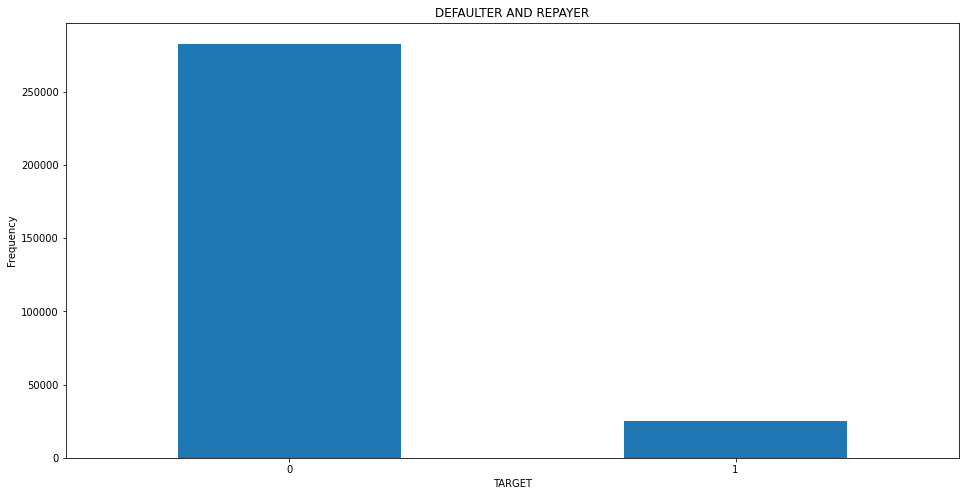

In [16]:
#Counting the number of defualter and repayer
count_classes = pd.value_counts(df_pd['TARGET'], sort = True)

count_classes.plot(kind = 'bar', rot=0,figsize=(16,8))

plt.title("DEFAULTER AND REPAYER")

#plt.xticks(range(2), LABELS)

plt.xlabel("TARGET")

plt.ylabel("Frequency")

In [ ]:
df_pd.plot(kind = 'bar')

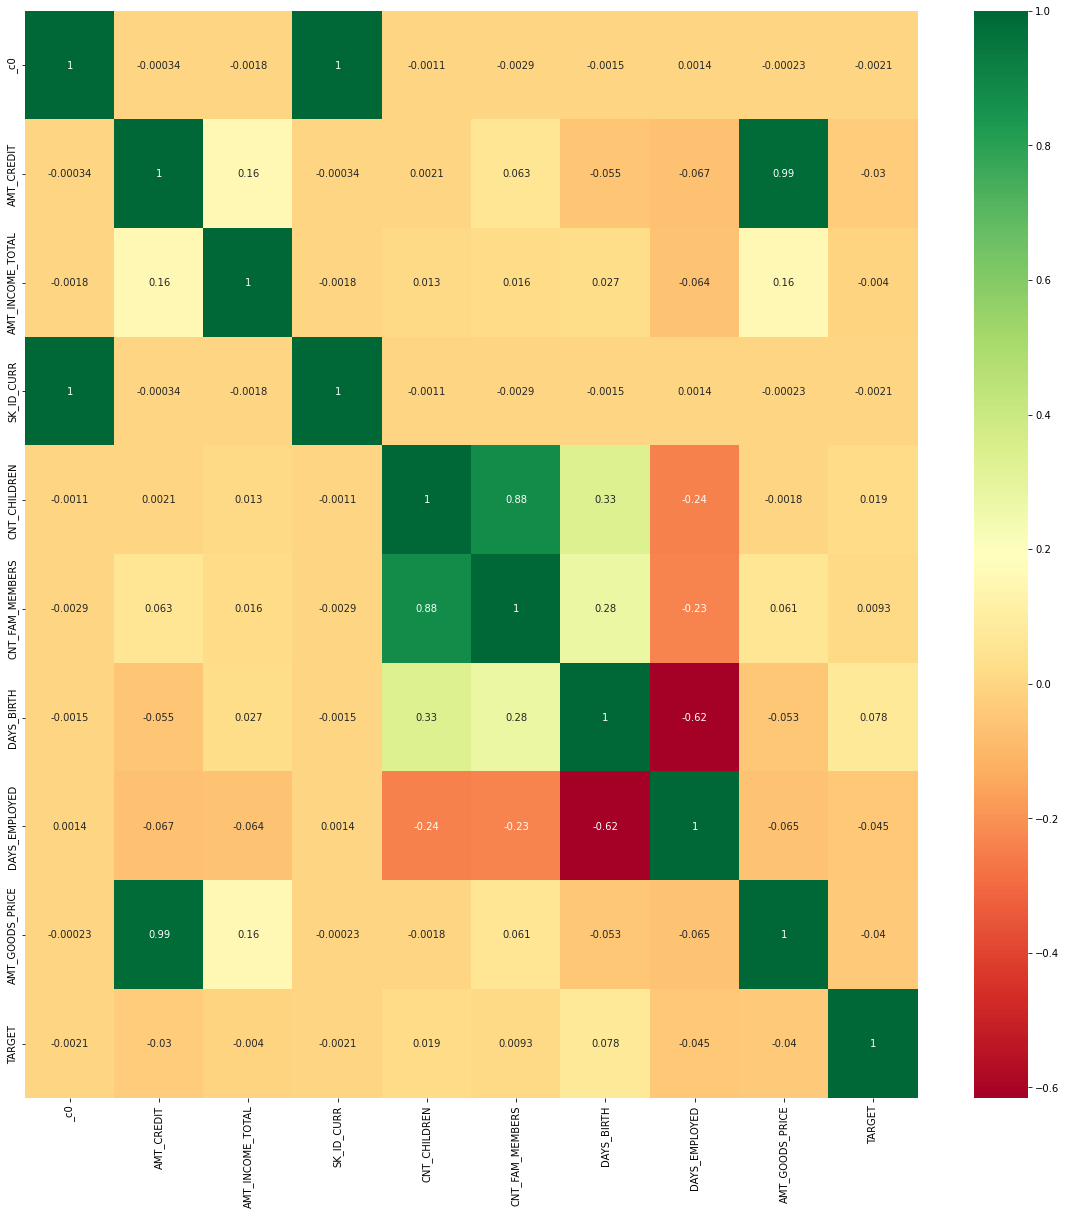

In [17]:
# Getting correlations of each features in dataset
corrmat = df_pd.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plotting heat map
g=sns.heatmap(df_pd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#label Encoder

le = LabelEncoder()
cols = ["NAME_HOUSING_TYPE","CODE_GENDER","NAME_FAMILY_STATUS","ORGANIZATION_TYPE","NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","OCCUPATION_TYPE"]

# Encode labels of multiple columns at once
df_pd[cols] = df_pd[cols].apply(LabelEncoder().fit_transform)

# Print head
df_pd.head()

,_c0,NAME_HOUSING_TYPE,AMT_CREDIT,AMT_INCOME_TOTAL,CODE_GENDER,SK_ID_CURR,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,TARGET
0,0,1,406597.5,202500.0,1,100002,3,0,1.0,5,-9461,-637,351000.0,4,7,8,1
1,1,1,1293502.5,270000.0,0,100003,1,0,2.0,39,-16765,-1188,1129500.0,1,4,3,0
2,2,1,135000.0,67500.0,1,100004,3,0,1.0,11,-19046,-225,135000.0,4,7,8,0
3,3,1,312682.5,135000.0,0,100006,0,0,2.0,5,-19005,-3039,297000.0,4,7,8,0
4,4,1,513000.0,121500.0,1,100007,3,0,1.0,37,-19932,-3038,513000.0,4,7,3,0


In [19]:
#checking which column have null value
df_pd.isnull().any().any()
df_pd.isnull().any()

_c0                    False
NAME_HOUSING_TYPE      False
AMT_CREDIT             False
AMT_INCOME_TOTAL       False
CODE_GENDER            False
SK_ID_CURR             False
NAME_FAMILY_STATUS     False
CNT_CHILDREN           False
CNT_FAM_MEMBERS         True
ORGANIZATION_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
AMT_GOODS_PRICE         True
NAME_EDUCATION_TYPE    False
NAME_INCOME_TYPE       False
OCCUPATION_TYPE        False
TARGET                 False
dtype: bool

In [20]:
# filling  null value using fillna() function  
df_clean = df_pd.fillna(method ='bfill')

In [21]:
#checking which column have null value again to ensure we have any remaining null value
df_clean.isnull().any()

_c0                    False
NAME_HOUSING_TYPE      False
AMT_CREDIT             False
AMT_INCOME_TOTAL       False
CODE_GENDER            False
SK_ID_CURR             False
NAME_FAMILY_STATUS     False
CNT_CHILDREN           False
CNT_FAM_MEMBERS        False
ORGANIZATION_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
AMT_GOODS_PRICE        False
NAME_EDUCATION_TYPE    False
NAME_INCOME_TYPE       False
OCCUPATION_TYPE        False
TARGET                 False
dtype: bool

In [22]:
#Creating independent and Dependent Features
columns = df_clean.columns.tolist()
# Filtering the columns to remove data we do not want 
columns = [c for c in columns if c not in ["TARGET"]]
# Storing the variable we are predicting 
target = "TARGET"
# Defining a random state 
state = np.random.RandomState(42)
X = df_clean[columns]
Y = df_clean[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Printing the shapes of X & Y
print(X.shape)
print(Y.shape)

(307511, 16)
(307511,)


In [23]:
# normalize the data attributes
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
print(normalized_X)

[[0.00000000e+00 1.71594732e-06 6.97699890e-01 ... 6.86378928e-06
  1.20116312e-05 1.37275786e-05]
 [5.74285820e-07 5.74285820e-07 7.42840144e-01 ... 5.74285820e-07
  2.29714328e-06 1.72285746e-06]
 [8.82421015e-06 4.41210508e-06 5.95634185e-01 ... 1.76484203e-05
  3.08847355e-05 3.52968406e-05]
 ...
 [2.89551295e-01 9.41605730e-07 6.38092306e-01 ... 9.41605730e-07
  6.59124011e-06 9.41605730e-06]
 [4.06879010e-01 1.32314505e-06 4.89705244e-01 ... 5.29258019e-06
  1.32314505e-06 1.05851604e-05]
 [2.76255414e-01 8.98362375e-07 6.06394603e-01 ... 8.98362375e-07
  8.98362375e-07 7.18689900e-06]]


In [24]:
#spliting the dataset for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(230633, 16)
(76878, 16)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.00      0.00      0.00      6091

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


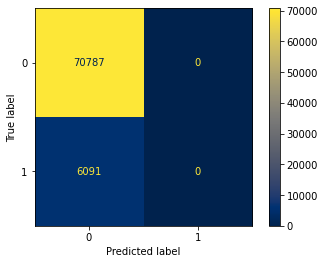

In [25]:
#Support Vector Machine model

model = svm.LinearSVC()
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
SVM_pr = model.predict(X_test)
print(classification_report(y_test, SVM_pr))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.00      0.00      0.00      6091

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


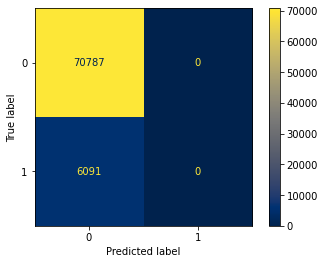

In [29]:
#Logistic Regression Model

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, cmap="cividis")
LR_pred = model.predict(X_test)
print(classification_report(y_test, LR_pred))

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# roc curve for models
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, SVM_pr)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

Text(0.5, 0, 'False Positive Rate')

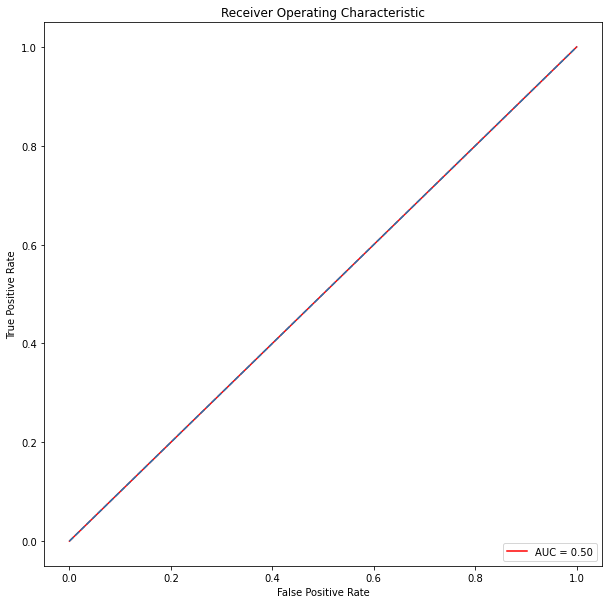

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

In [33]:
# class count
class_count_0, class_count_1 = df_clean["TARGET"].value_counts()

# Separate class
class_0 = y[y == 0]
class_1 = y[y == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape
)


class 0: (282686,)
class 1: (282686,)


Text(0, 0.5, 'Frequency')

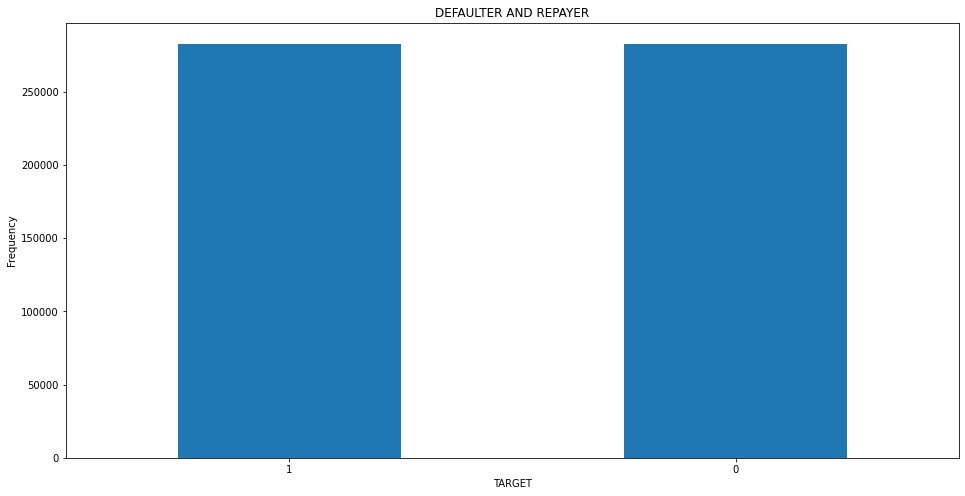

In [34]:
#Counting the number of defualter and repayer
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0,figsize=(16,8))

plt.title("DEFAULTER AND REPAYER")

#plt.xticks(range(2), LABELS)

plt.xlabel("TARGET")

plt.ylabel("Frequency")

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(424029, 16)
(141343, 16)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.55      0.39      0.46     70500
           1       0.53      0.68      0.60     70843

    accuracy                           0.54    141343
   macro avg       0.54      0.54      0.53    141343
weighted avg       0.54      0.54      0.53    141343



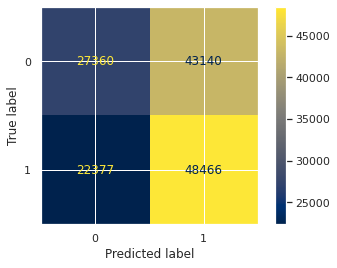

In [77]:
#Logistic Regression Model

model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)
plot_confusion_matrix(model, X_test, Y_test, cmap="cividis")
LR_pred0 = model.predict(X_test)
print(classification_report(Y_test, LR_pred0))

Text(0.5, 0, 'False Positive Rate')

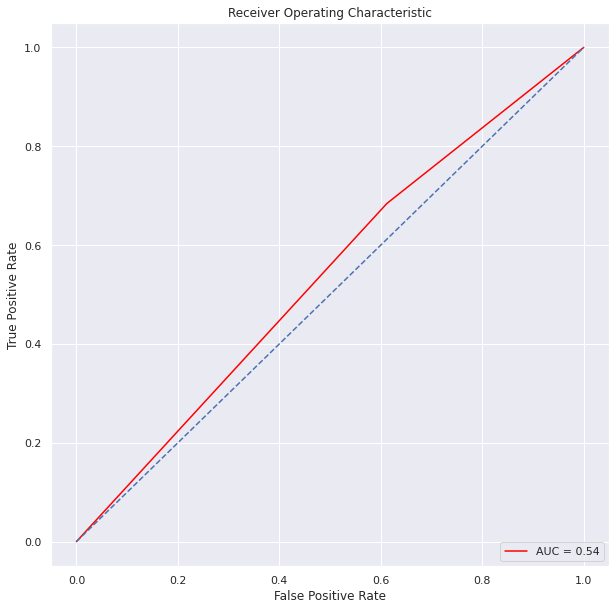

In [78]:

# roc curve for models
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, LR_pred0)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.55      0.39      0.46     70500
           1       0.53      0.68      0.60     70843

    accuracy                           0.54    141343
   macro avg       0.54      0.54      0.53    141343
weighted avg       0.54      0.54      0.53    141343



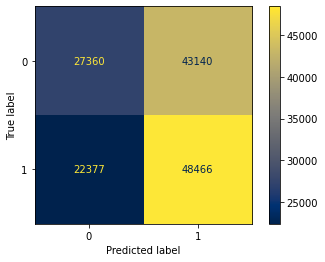

In [38]:
#Support Vector Machine model

model = svm.LinearSVC()
model.fit(X_train, Y_train)
plot_confusion_matrix(model, X_test, Y_test, cmap="cividis")
SVM_pr = model.predict(X_test)
print(classification_report(Y_test, SVM_pr))

Text(0.5, 0, 'False Positive Rate')

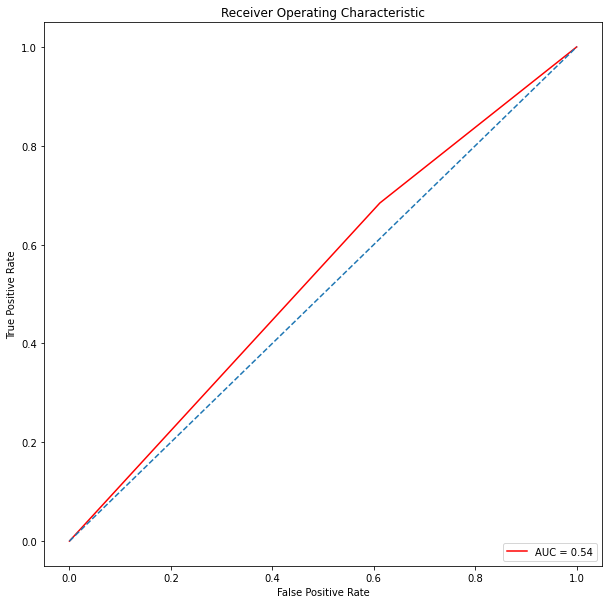

In [39]:

# roc curve for models
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, SVM_pr)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

NOW ANALYZING WITH ONE HOT ENCODER TO COMAPRE WITH LABEL ENCODER AS LABEL ENCODER PERFORMANCE IS NOT GOOD WHILE BALANCING DATASET

In [53]:
#USING ONE-HOT ENCODERindexer = StringIndexer(inputCol="CODE_GENDER", outputCol="GenderClass", handleInvalid="keep")
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="CODE_GENDER", outputCol="GenderClass", handleInvalid="keep")
df_loan = indexer.fit(df).transform(df)
df_loan.select(['NAME_HOUSING_TYPE','CODE_GENDER',"GenderClass",'TARGET']).show(10)

+-----------------+-----------+-----------+------+
|NAME_HOUSING_TYPE|CODE_GENDER|GenderClass|TARGET|
+-----------------+-----------+-----------+------+
|House / apartment|          M|        1.0|     1|
|House / apartment|          F|        0.0|     0|
|House / apartment|          M|        1.0|     0|
|House / apartment|          F|        0.0|     0|
|House / apartment|          M|        1.0|     0|
|House / apartment|          M|        1.0|     0|
|House / apartment|          F|        0.0|     0|
|House / apartment|          M|        1.0|     0|
|House / apartment|          F|        0.0|     0|
|House / apartment|          M|        1.0|     0|
+-----------------+-----------+-----------+------+
only showing top 10 rows



In [54]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import IndexToString
from pyspark.sql.functions import isnan, when, count, col, year, quarter, lit, to_date, to_timestamp, concat, avg

In [55]:
categories = df_loan.select("NAME_HOUSING_TYPE").distinct().toPandas().NAME_HOUSING_TYPE.tolist()
#print(categories)
exprs = [F.when(F.col("NAME_HOUSING_TYPE") == category, 1).otherwise(0).alias(category)
         for category in categories]

df_loan = df_loan.select("*", *exprs)

newCategories = []
for category in categories:
    df_loan = df_loan.withColumnRenamed(category, "NAME_HOUSING_TYPE_"+category)
    newCategories.append("NAME_HOUSING_TYPE_"+category)
print(newCategories)

['NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_With parents']


In [56]:
categories = df_loan.select("NAME_FAMILY_STATUS").distinct().toPandas().NAME_FAMILY_STATUS.tolist()
#print(categories)
exprs = [F.when(F.col("NAME_FAMILY_STATUS") == category, 1).otherwise(0).alias(category)
         for category in categories]

df_loan = df_loan.select("*", *exprs)

newCategories = []
for category in categories:
    df_loan = df_loan.withColumnRenamed(category, "NAME_FAMILY_STATUS_"+category)
    newCategories.append("NAME_FAMILY_STATUS_"+category)

In [57]:
categories = df_loan.select("ORGANIZATION_TYPE").distinct().toPandas().ORGANIZATION_TYPE.tolist()
#print(categories)
exprs = [F.when(F.col("ORGANIZATION_TYPE") == category, 1).otherwise(0).alias(category)
         for category in categories]

df_loan = df_loan.select("*", *exprs)

newCategories = []
for category in categories:
    df_loan = df_loan.withColumnRenamed(category, "ORGANIZATION_TYPE_"+category)
    newCategories.append("ORGANIZATION_TYPE_"+category)

In [58]:
categories = df_loan.select("NAME_EDUCATION_TYPE").distinct().toPandas().NAME_EDUCATION_TYPE.tolist()
#print(categories)
exprs = [F.when(F.col("NAME_EDUCATION_TYPE") == category, 1).otherwise(0).alias(category)
         for category in categories]

df_loan = df_loan.select("*", *exprs)

newCategories = []
for category in categories:
    df_loan = df_loan.withColumnRenamed(category, "NAME_EDUCATION_TYPE_"+category)
    newCategories.append("NAME_EDUCATION_TYPE_"+category)

In [59]:
categories = df_loan.select("NAME_INCOME_TYPE").distinct().toPandas().NAME_INCOME_TYPE.tolist()
#print(categories)
exprs = [F.when(F.col("NAME_INCOME_TYPE") == category, 1).otherwise(0).alias(category)
         for category in categories]

df_loan = df_loan.select("*", *exprs)

newCategories = []
for category in categories:
    df_loan = df_loan.withColumnRenamed(category, "NAME_INCOME_TYPE_"+category)
    newCategories.append("NAME_INCOME_TYPE_"+category)

In [61]:
df_loan=df_loan.drop('_c0','NAME_HOUSING_TYPE','CODE_GENDER','NAME_FAMILY_STATUS','ORGANIZATION_TYPE','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE')

In [62]:
# Inputing mean value for null values
mean = int(df_loan.select(avg("AMT_CREDIT")).take(1)[0][0])
df_loan = df_loan.withColumn("AMT_CREDIT", when(col("AMT_CREDIT").isNull(), lit(mean))
                                           .otherwise(col("AMT_CREDIT")))
mean = int(df_loan.select(avg("AMT_INCOME_TOTAL")).take(1)[0][0])
df_loan = df_loan.withColumn("AMT_INCOME_TOTAL", when(col("AMT_INCOME_TOTAL").isNull(), lit(mean))
                                           .otherwise(col("AMT_INCOME_TOTAL")))

mean = int(df_loan.select(avg("SK_ID_CURR")).take(1)[0][0])
df_loan = df_loan.withColumn("SK_ID_CURR", when(col("SK_ID_CURR").isNull(), lit(mean))
                                           .otherwise(col("SK_ID_CURR")))


mean = int(df_loan.select(avg("CNT_CHILDREN")).take(1)[0][0])
df_loan = df_loan.withColumn("CNT_CHILDREN", when(col("CNT_CHILDREN").isNull(), lit(mean))
                                           .otherwise(col("CNT_CHILDREN")))


mean = int(df_loan.select(avg("CNT_FAM_MEMBERS")).take(1)[0][0])
df_loan = df_loan.withColumn("CNT_FAM_MEMBERS", when(col("CNT_FAM_MEMBERS").isNull(), lit(mean))
                                           .otherwise(col("CNT_FAM_MEMBERS")))

mean = int(df_loan.select(avg("DAYS_BIRTH")).take(1)[0][0])
df_loan = df_loan.withColumn("DAYS_BIRTH", when(col("DAYS_BIRTH").isNull(), lit(mean))
                                           .otherwise(col("DAYS_BIRTH")))

mean = int(df_loan.select(avg("DAYS_EMPLOYED")).take(1)[0][0])
df_loan = df_loan.withColumn("DAYS_EMPLOYED", when(col("DAYS_EMPLOYED").isNull(), lit(mean))
                                           .otherwise(col("DAYS_EMPLOYED")))


mean = int(df_loan.select(avg("AMT_GOODS_PRICE")).take(1)[0][0])
df_loan = df_loan.withColumn("AMT_GOODS_PRICE", when(col("AMT_GOODS_PRICE").isNull(), lit(mean))
                                           .otherwise(col("AMT_GOODS_PRICE")))





In [63]:
colList = df_loan.columns
print(colList)
print(len(colList))
colList.remove("TARGET")
print(colList)
print(len(colList))

['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'SK_ID_CURR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'TARGET', 'GenderClass', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Unknown', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_FAMILY_STATUS_Civil marriage', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Telecom', 'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Transport: type 2', 'ORGANIZATION_TYPE_Housing', 'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Security', 'ORGANIZATION_TYPE_Postal', 'ORGANIZATION_TYPE_School',

In [64]:
assembler = VectorAssembler(inputCols=[ *colList ], outputCol="features")

loanDFTransformed = assembler.transform( df_loan)

loanDFTransformed.show(5)

+----------+----------------+----------+------------+---------------+----------+-------------+---------------+------+-----------+-----------------------------------+-------------------------------------+---------------------------------+----------------------------------+----------------------------------+------------------------------+----------------------------+--------------------------+--------------------------+---------------------------------------+------------------------+---------------------------------+--------------------------+-------------------------------+-----------------------------------+-------------------------+----------------------+----------------------------------+-----------------------------+-----------------------------------+-------------------------+---------------------------+--------------------------+------------------------+------------------------+----------------------------+-------------------------------------+--------------------------+----------

In [65]:
labelIndexer = StringIndexer(inputCol="TARGET", outputCol="CLASS", handleInvalid="keep")
#val df3 = labelIndexer.fit(df2).transform(df2)
loanDFTransformed_2 = labelIndexer.fit(loanDFTransformed).transform(loanDFTransformed)

loanDFTransformed_2.show(5)

+----------+----------------+----------+------------+---------------+----------+-------------+---------------+------+-----------+-----------------------------------+-------------------------------------+---------------------------------+----------------------------------+----------------------------------+------------------------------+----------------------------+--------------------------+--------------------------+---------------------------------------+------------------------+---------------------------------+--------------------------+-------------------------------+-----------------------------------+-------------------------+----------------------+----------------------------------+-----------------------------+-----------------------------------+-------------------------+---------------------------+--------------------------+------------------------+------------------------+----------------------------+-------------------------------------+--------------------------+----------

In [66]:
clean_loandf=loanDFTransformed_2.toPandas()

307511
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     70687
         1.0       0.00      0.00      0.00      6191

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


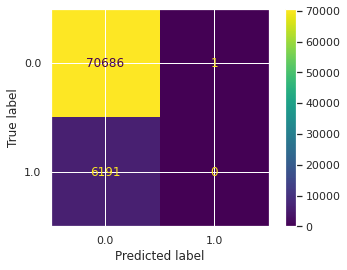

In [67]:
data = clean_loandf
print(len(data))
label_names = data['CLASS']
labels = data['CLASS']
feature_names = clean_loandf.drop(['features','CLASS'],axis=1)
features =  feature_names
train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.25, random_state = 42)

#LOGISTIC REGESSION MODEL
# define the model
clf = LogisticRegression()
clf.fit(train, train_labels)
# evaluate the model
pred=clf.predict(test)
#print(accuracy_score(test_labels,pred))
print(classification_report(test_labels, pred))
plot_confusion_matrix(clf,  test, test_labels)

Text(0.5, 0, 'False Positive Rate')

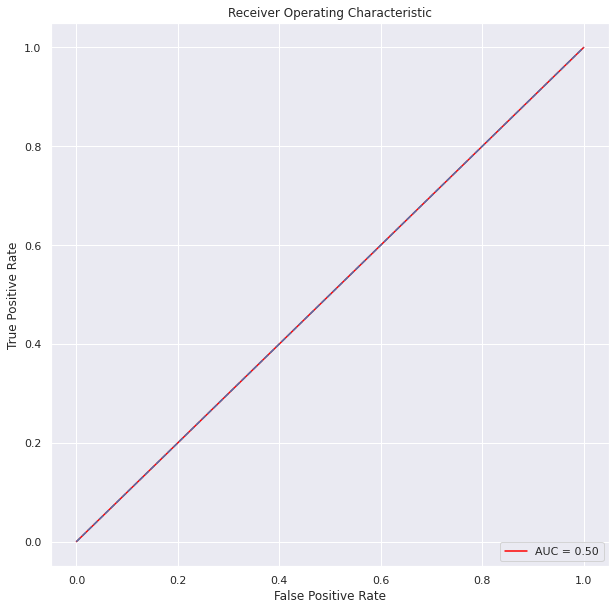

In [68]:
# roc curve for models
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [69]:
#BALANCING THE DATASET
df1=clean_loandf.query("CLASS == 0.0").sample(n=30000)
df2=clean_loandf.query("CLASS == 1.0").sample(n=24825)


In [70]:
frames=[df1,df2]
balancedDF= pd.concat(frames)


54825
0.5739403224629751
              precision    recall  f1-score   support

         0.0       0.58      0.82      0.68      7464
         1.0       0.56      0.28      0.38      6243

    accuracy                           0.57     13707
   macro avg       0.57      0.55      0.53     13707
weighted avg       0.57      0.57      0.54     13707



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


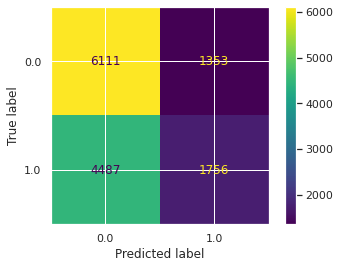

In [72]:
# define dataset
data = balancedDF
print(len(data))
label_names = data['CLASS']
labels = data['CLASS']
feature_names = balancedDF.drop(['features','CLASS'],axis=1)
features =  feature_names
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 0.25, random_state = 42)
# define the model
clf = LogisticRegression()
clf.fit(train, train_labels)
# evaluate the model
pred1=clf.predict(test)
print(accuracy_score(test_labels,pred1))
print(classification_report(test_labels, pred1))
plot_confusion_matrix(clf,  test, test_labels)  

Text(0.5, 0, 'False Positive Rate')

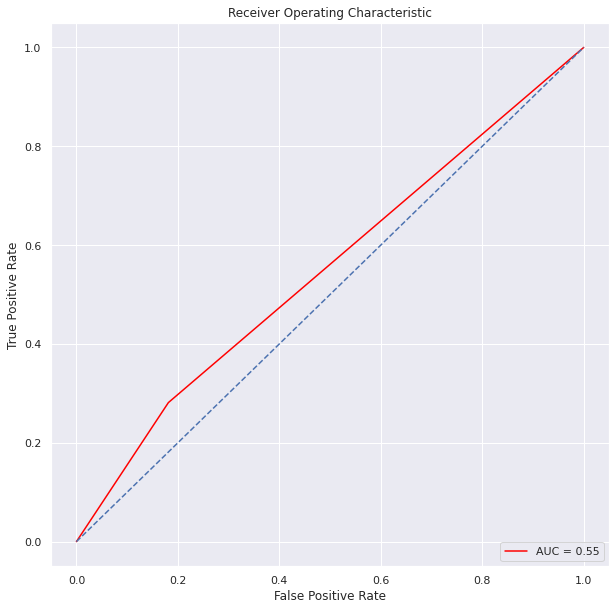

In [73]:
# roc curve for models
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')